In [ ]:
!pip install pandas
!pip install wordcloud
!pip install matplotlib

### Importing the required modules to process and visualize the world Corona datasets  
**Note:** By the time of this notebook creation, word cloud is not support by python version 3.9x and above and may cause error during installation. Follow the following steps to get around the issue.  
1. Follow the link and [Download the .whl](http://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud) to your desired location from which you'll install the binary file.
2. Using **``gitbash``** or **``cmd``** change directory or **```cd```** to the **```.whl```** file location
3. Run this command **``python -m pip install <filename>``** (not forgeting to include the **.whl**) file extension

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [30]:
confirmed = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

data_cont =  r'https://raw.githubusercontent.com/oderofrancis/rona/main/Countries-Continents.csv'

In [31]:
confirmed = pd.read_csv(confirmed)
data_cont = pd.read_csv(data_cont)
data_cont

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina Faso
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


In [32]:
data_con = confirmed[['Country/Region',confirmed.columns[-1]]]

data_con.columns = ['country','confirmed']

data_cont.columns = ['continent','country']

In [33]:
data_con = pd.merge(left=data_cont, 
                right=data_con, how='left', 
                left_on='country', right_on='country'
            )


In [34]:
data_con = " ".join(cat.split()[0] for cat in data_con.country)

In [35]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(data_con)

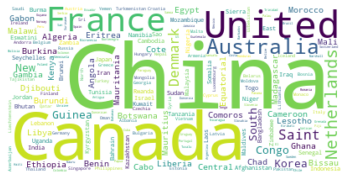

In [36]:
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

plt.show()